In [1]:
import keras
from keras import backend as K
import numpy as np
from siamese_nucvar import SiameseNetwork
from sklearn import manifold
from matplotlib import pyplot as plt

In [2]:
def indv_ord_augmentation(almt):
            q = almt.copy()
            np.random.shuffle(q.T)
            return q

In [3]:
a = np.load('theta_sim.npz')
x_train, x_test = [a[i] for i in ['xtrain', 'xtest']]

#print(x_train[1].shape)
img_rows, img_cols = x_train[1].shape[0], x_train[1].shape[1]
print(img_cols, img_rows)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

40 489


In [4]:
model = keras.models.load_model("8.epoch.test_base")
model.compile()

In [5]:
x_dups = np.array([indv_ord_augmentation(i) for i in x_test[:500]] + [indv_ord_augmentation(i) for i in x_test[:500]])

In [6]:
emb = model.predict(x_dups)

In [7]:
u = manifold.TSNE().fit_transform(emb)

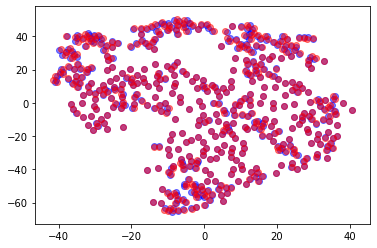

In [8]:
plt.scatter([i[0] for i in u[:500]], [i[1] for i in u[:500]], color='b', alpha=.5)
plt.scatter([i[0] for i in u[500:]], [i[1] for i in u[500:]], color='r', alpha=.5)

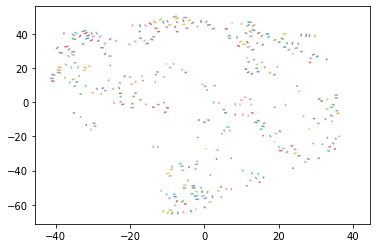

In [9]:
f=plt.plot( [[i[0] for i in u[:500]],[i[0] for i in u[500:]]], [[i[1] for i in u[:500]],[i[1] for i in u[500:]]],  alpha=.7)

In [10]:
x_seg_site_D = {} #dict of lists of matrices with grouped by number of seg sites, with seg sites as key
for i in x_test:
    seg_sites = sum(i.sum(axis=1) > 0)[0]        
    if seg_sites not in x_seg_site_D : x_seg_site_D[seg_sites] = []
    x_seg_site_D[seg_sites].append(i)

In [11]:
[(i, len(x_seg_site_D[i])) for i in sorted(x_seg_site_D)]

[(17, 1),
 (22, 1),
 (23, 1),
 (25, 1),
 (26, 3),
 (28, 1),
 (29, 2),
 (30, 3),
 (32, 2),
 (33, 4),
 (34, 4),
 (35, 4),
 (36, 3),
 (37, 4),
 (38, 6),
 (39, 4),
 (40, 3),
 (41, 3),
 (42, 4),
 (43, 7),
 (44, 5),
 (45, 5),
 (46, 8),
 (47, 3),
 (48, 4),
 (49, 5),
 (50, 8),
 (51, 4),
 (53, 6),
 (54, 6),
 (55, 2),
 (56, 3),
 (57, 6),
 (58, 7),
 (59, 10),
 (60, 2),
 (61, 5),
 (62, 9),
 (63, 9),
 (64, 7),
 (65, 3),
 (66, 6),
 (67, 7),
 (68, 4),
 (69, 6),
 (70, 4),
 (71, 5),
 (72, 4),
 (73, 3),
 (74, 7),
 (75, 6),
 (76, 7),
 (77, 5),
 (78, 7),
 (79, 5),
 (80, 3),
 (81, 7),
 (82, 10),
 (83, 2),
 (84, 6),
 (85, 2),
 (86, 6),
 (87, 5),
 (88, 5),
 (89, 10),
 (90, 11),
 (91, 7),
 (92, 5),
 (93, 5),
 (94, 7),
 (95, 4),
 (96, 9),
 (97, 8),
 (98, 4),
 (99, 8),
 (100, 10),
 (101, 9),
 (102, 4),
 (103, 11),
 (104, 7),
 (105, 7),
 (106, 4),
 (107, 9),
 (108, 3),
 (109, 3),
 (110, 7),
 (111, 3),
 (112, 2),
 (113, 11),
 (114, 12),
 (115, 7),
 (116, 5),
 (117, 7),
 (118, 7),
 (119, 2),
 (120, 8),
 (121, 7),


In [12]:
l = []
for i in x_seg_site_D[129]:
    for j in range(10):
        l.append(indv_ord_augmentation(i.reshape(489,40)).reshape((489,40,1)))
emb = model.predict(np.array(l))

In [13]:
u = manifold.TSNE().fit_transform(emb)

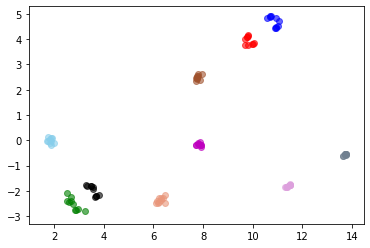

In [14]:
for p,c in zip(range(0, 100, 10), ('r', 'b', 'k', 'g', 'm', 'darksalmon', 'sienna', 'plum', 'slategrey', 'skyblue')):
    plt.scatter([i[0] for i in u[p:p+10]], [i[1] for i in u[p:p+10]], color=c, alpha=.6)
